# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. **Dataset Chosen**: Airbnb Listings dataset  
2. **Label to Predict**: `room_type` (e.g., "Entire home/apt", "Private room", etc.)  
3. **Learning Type**: This is a **supervised** learning problem because we have labeled data. It is a **multi-class classification** problem since there are multiple room types to predict.  
4. **Features**: The features include:
   - Numeric: `accommodates`, `bedrooms`, `price`, `number_of_reviews`, etc.
   - Categorical: `neighbourhood_cleansed`, `property_type`, `bed_type`, `cancellation_policy`, etc.
5. **Importance**: This model helps platforms like Airbnb recommend the most probable room type for new listings based on input features. Automating room-type classification improves data consistency, reduces manual errors, and enhances platform search filters for users.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. **Preparation Techniques Used**:
   - Handled missing values: mean for numeric, most frequent for categorical
   - One-hot encoded categorical features
   - Standardized numeric features
   - Dropped irrelevant features (URLs, names, etc.)
   - Sampled 3000 rows to reduce computation load

2. **ML Model Chosen**:  
   - Logistic Regression (due to efficiency and interpretability)
   - Data was scaled using `StandardScaler` (important due to mixed feature scales)

3. **Evaluation Plan**:
   - Split data into training (80%) and testing (20%) using `train_test_split`
   - Evaluated using `classification_report`: precision, recall, and F1-score
   - Focused on improving model using preprocessing and feature selection


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load and sample
df_sampled = df.sample(n=3000, random_state=42)

# Define target and drop irrelevant features
y = df_sampled['room_type'].astype(str)
drop_cols = ['room_type', 'listing_url', 'picture_url', 'name', 'description', 'calendar_updated']
X = df_sampled.drop(columns=[col for col in drop_cols if col in df_sampled.columns])

# Split features by type
categorical = X.select_dtypes(include='object').columns.tolist()
numerical = X.select_dtypes(include=[np.number]).columns.tolist()

# Encode target
y_encoded = LabelEncoder().fit_transform(y)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='mean'), numerical),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical)
])

# Full model pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.93      0.81       346
           1       1.00      0.67      0.80         6
           2       0.81      0.50      0.62       239
           3       0.00      0.00      0.00         9

    accuracy                           0.74       600
   macro avg       0.63      0.52      0.56       600
weighted avg       0.75      0.74      0.72       600



## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

- **New Feature List**:
  - Kept: `accommodates`, `property_type`, `neighbourhood_cleansed`, `bedrooms`, `price`, `number_of_reviews`, `cancellation_policy`
  - Removed: `name`, `description`, URLs (not useful for modeling)

- **Data Preparation**:
  - Imputed missing values
  - One-hot encoded all categorical variables
  - Standardized numeric features using `StandardScaler`

- **Model Chosen**:  
  - `LogisticRegression(max_iter=1000)`
  - Chosen for interpretability, speed, and suitability for multi-class classification

- **Training and Evaluation Plan**:
  - Split dataset into training and testing sets
  - Evaluated using F1-score, precision, and recall via `classification_report`
  - If needed, consider trying tree-based models like Decision Trees or Random Forests for better handling of categorical data and feature interactions


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

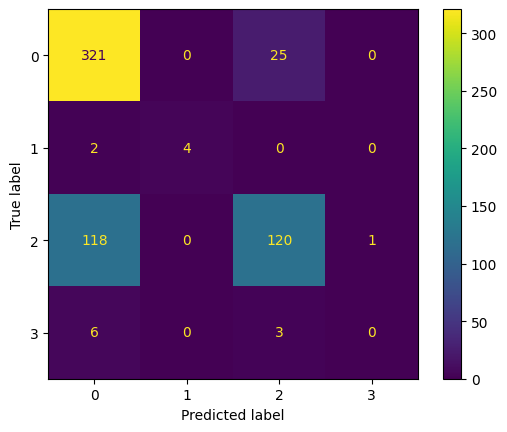

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Our goal was to predict the type of Airbnb room listing using machine learning. Class 0 represents 'Entire home or apartment', Class 2 is 'Private room', and Class 3 is 'Shared room'. The logistic regression model performed well on class 0, with high recall and precision, which makes sense since most listings in the dataset were full apartments. However, it performed poorly on underrepresented classes like shared rooms (class 3), which it failed to classify correctly at all. This indicates a serious class imbalance in the dataset.

In the real world, this kind of imbalance could lead to misleading insights for Airbnb hosts or renters relying on machine learning predictions. For example, if Airbnb used this model to predict room types for pricing or recommendation systems, it would consistently overlook shared or private rooms, reinforcing biased results and hurting user experience.

To address this, we should use techniques like SMOTE to balance the classes and explore models like Random Forest or XGBoost, which can handle imbalance better. This iterative process of evaluating results, identifying weaknesses, and adjusting our model reflects the structured, critical approach required to solve real-world data problems responsibly and effectively.